# LEGO Regression Project

## Introduction 

In this notebook you'll perform a simple linear regression analysis and report the findings of your model, including both predictive model performance metrics and interpretation of fitted model parameters.

## Objectives

You will be able to:

* Write an SQL query to pull data from an SQL database
* Perform a simple linear regression analysis 
* Evaluate your model and interpret its predictive performance metrics
* Apply an inferential lens to interpret relationships between variables identified by the model

# Task: Develop a LEGO Pricing Algorithm

![pile of legos](images/legos.jpg)

Photo by <a href="https://unsplash.com/@xavi_cabrera?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Xavi Cabrera</a> on <a href="/s/photos/lego?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## Business Understanding

You just got hired by LEGO! Your first project is going to be to develop a pricing algorithm in order to analyze the value of individual lego pieces.

The primary purpose of this algorithm is *inferential*, meaning that **your model should be able to tell us something about the relationship between the attributes of a LEGO set and its price**. You will apply your knowledge of statistics to include appropriate caveats about these relationships.

## Data Understanding

You have been given access to an sql database containing over 700 LEGO sets released in the past, including attributes of those sets as well as their prices.

You do not need to worry about inflation or differences in currency; just predict the same kinds of prices as are present in the past data, which have already been converted to USD.

## Loading the Data

The database for this project is stored at the path `data/legos.db` in this project repository. The entity relational diagram (E.R.D) for the legos database is displayed below. 

To load in the data, you will need to complete the following tasks:
- Open up a connection to the legos database
- Write an sql query to join all three tables together
- Run the sql query and load the joined tables into a pandas dataframe
    - The easiest method for completing this task is to use the `pd.read_sql` method ([Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html))
    - Store the pandas dataframe in a variable called `df`

![Entity Relational Diagram](images/erd.png)

In [194]:
# Run this cell without changes
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
# __SOLUTION__
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
# Replace None with your code

connection = None

sql_query = None

df = None

In [197]:
# __SOLUTION__

connection = sqlite3.connect('data/legos.db')

sql_query = """
            SELECT * FROM difficulty d
            INNER JOIN product_info p
            USING("Prod Id")
            INNER JOIN metrics m
            USING("Prod Id")
            """

df = pd.read_sql(sql_query, connection)

### Todo:


- ~Add duplicates~
- ~Add null values~
    - ~In the target column~
    
- Outliers.
- ~Change formatting of column names~
- ~Make target column a string by adding a '$'~
- Branch: da-linear-regression

## Analysis Requirements

### 1. Data Exploration and Cleaning

During the data exploration phase, the datatypes of columns should be checked, the distribution of the target variable should be inspected, null values should be either removed or replaced, and duplicates (in most cases) should be dropped. 

### 2. Create a Baseline Model

In order to evaluate how well a simple linear regression model is understanding the dependent variable, we will begin by first creating a model that predicts the mean of the dependent variable for every observation. Predicting the mean of `list_price` can be considered a highly naive model. If our simple linear regression model performs worse than this naive approach, we can safetly say that it is not a very good model. 

### 3. Interpret a Correlation Heatmap

To develop a simple linear regression model, we will identify the independent variable that is most correlated with our dependent variable. To do this this we will plot a correlation heatmap to identify the variable most correlated with `list_price`.

### 4. Build a Simple Linear Regression Model

Now, create a linear regression model using the `statsmodels` library where the most correlated feature is used as the independent variable and the dependent variable is properly set. 

### 5. Interpret the Simple Linear Regression Model

Once the model has been fit, the coefficient for our independent variable, its p-value, and the coefficient confidence interval should be interpeted. We should ask ourselves whether or not the relationship our model is finding seems plausible. 

### 6. Evaluate the Simple Linear Regression Model

Before we can make a final assessment of our model, we need to compare its metrics with the baseline model created in step one, and we need to check the assumptions of linear regression.


# 1. Data Exploration and Cleaning

Inspect the dataframe by outputting the first five rows.

In [198]:
# Replace None with your code

None

In [199]:
# __SOLUTION__

df.head()

,Prod Id,Min Age,Max Age,Difficulty Level,Set Name,Prod Desc,Theme Name,Piece Count,Num Reviews,Star Rating,List Price
0,60123,7.0,12.0,1,Volcano Supply Helicopter,Fly in the exploration gear and fly out the cr...,City,330,3.0,4.3,$49.99
1,71246,7.0,14.0,1,Adventure Time™ Team Pack,Explore the Land of Ooo with Jake and Lumpy Sp...,DIMENSIONS™,96,3.0,4.7,$30.362
2,10616,1.5,5.0,1,My First Playhouse,Learn about daily routines with this easy-to-b...,DUPLO®,25,3.0,5.0,$19.99
3,31079,8.0,12.0,1,Sunshine Surfer Van,Enjoy seaside fun with the 3-in-1 Sunshine Sur...,Creator 3-in-1,379,5.0,4.4,$34.99
4,42057,8.0,14.0,1,Ultralight Helicopter,Take to the skies with the Ultralight Helicopter!,Technic,199,9.0,4.7,$19.99


Produce high-level descriptive information about your training data

In [200]:
# Replace None with your code

None

In [201]:
# __SOLUTION__

df.describe()

,Prod Id,Min Age,Max Age,Difficulty Level,Piece Count,Num Reviews,Star Rating
count,8.840000e+02,884.000000,884.000000,884.000000,884.000000,781.000000,781.000000
mean,5.821184e+04,6.781674,27.785068,1.483032,460.990950,17.610755,4.430602
std,1.388029e+05,2.984551,34.019566,0.796898,928.905788,38.143280,0.592083
min,6.300000e+02,1.500000,3.000000,0.000000,1.000000,1.000000,1.800000
25%,2.113875e+04,5.000000,12.000000,1.000000,88.750000,2.000000,4.100000
50%,4.550550e+04,7.000000,14.000000,2.000000,185.500000,6.000000,4.600000
75%,7.122825e+04,8.000000,14.000000,2.000000,457.750000,13.000000,4.900000
max,2.000431e+06,16.000000,99.000000,4.000000,7541.000000,367.000000,5.000000


Display the number of null values for each column

In [202]:
# Replace None with your code

None

In [203]:
#__SOLUTION__
df.isna().sum()

Prod Id               0
Min Age               0
Max Age               0
Difficulty Level      0
Set Name              0
Prod Desc            20
Theme Name            0
Piece Count           0
Num Reviews         103
Star Rating         103
List Price           40
dtype: int64

We have four columns that contain null values. Of those four, `List Price`, which is our dependent variable, is probably the most concerning. 

In the cell below, drop all rows where `List Price` is null.

In [204]:
# Replace None with your code

None

In [205]:
#__SOLUTION__
df = df.dropna(subset=['List Price'])

To make things easier moving forward, in the cell below, reformat the column names so spaces have been replaced with underscores and the text has been lowered.

In [206]:
# Replace None with your code

None

In [207]:
#__SOLUTION__
df.columns = df.columns.str.lower().str.replace(' ', '_')

Run the cell below to check your reformatting. If it runs without throwing an error it means you have reformatted the columns correctly.

In [208]:
assert 'min_age' in df.columns

Check the datatypes of the columns in the dataframe. 
> Remember, the target column and any columns we use as independent variables *must* have a numeric datatype. After inspecting the datatypes of the columns, convert columns to numeric where necessary. 

In [209]:
# Replace None with your code

None

In [210]:
#__SOLUTION__
print(df.dtypes)

df.list_price = df.list_price.str.replace('$', '').astype(float)

prod_id               int64
min_age             float64
max_age             float64
difficulty_level      int64
set_name             object
prod_desc            object
theme_name           object
piece_count           int64
num_reviews         float64
star_rating         float64
list_price           object
dtype: object


<ipython-input-210-8528c0020878>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df.list_price = df.list_price.str.replace('$', '').astype(float)


In the cell below, output the number of duplicate rows in the dataframe. If duplicates are found, drop them.

In [211]:
# Replace None with your code

None

In [212]:
#__SOLUTION__
print('Duplicated rows:', df.duplicated().sum())

df = df.drop_duplicates()

Duplicated rows: 100


Visualize the distribution of the dependent variable

In [213]:
# Replace None with your code

None

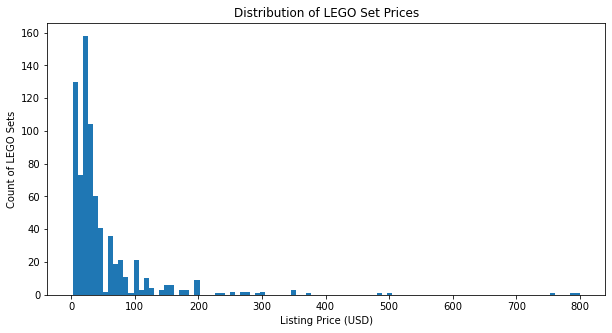

In [214]:
# __SOLUTION__

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(df.list_price, bins=100)

ax.set_xlabel("Listing Price (USD)")
ax.set_ylabel("Count of LEGO Sets")
ax.set_title("Distribution of LEGO Set Prices");

# Create a Baseline Model

Below, we create a baseline model. To do this we must:

1. Calculate the mean of the `list_price` column in the `train` dataframe.
2. Create a list with the same length as the `list_price` column where every value in the list is the mean that was calculated in the previous task. 
    - Store this list in the variable `baseline_preds`.

In [215]:
# Calculate the mean of the list_price column in the train dataframe.
mean = None

# Create a list with the same length as the list_price column where every value in the list is the mean
baseline_preds = None

In [216]:
#__SOLUTION__
from sklearn.metrics import r2_score, mean_squared_error

# Calculate the mean of the list_price column in the train dataframe.
mean = train.list_price.mean()

# Create a list with the same length as the list_price column where every value in the list is the mean
baseline_preds = [mean for x in train.index]

# Pass the list_price column and the baseline_preds list into the function r2_score
baseline_r2 = r2_score(train.list_price, baseline_preds)

# Pass the list_price column and the baseline_preds list 
# into the function mean_squared_error and setting squared to False
baseline_rmse = mean_squared_error(train.list_price, baseline_preds, squared=False)

print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)

Baseline R^2:  0.0
Baseline RMSE: 70.31606908300459


Now that we have baseline predictions, we can use the predictions to calculate metrics about the model's performance. 

In [217]:
from sklearn.metrics import r2_score, mean_squared_error

# Pass the list_price column and the baseline_preds list into the function r2_score
baseline_r2 = r2_score(train.list_price, baseline_preds)

# Pass the list_price column and the baseline_preds list 
# into the function mean_squared_error and setting squared to False
baseline_rmse = mean_squared_error(train.list_price, baseline_preds, squared=False)

print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)

Baseline R^2:  0.0
Baseline RMSE: 70.31606908300459


**Interpret the resulting metrics for the baseline model.**

- How well is the model explaining the variance of the dependent variable?
- On average, how many dollars off are the models predictions?

==SOLUTION==

The baseline model is doing a poor job at explaining the variance of the dependent variable. An $R^2$ of `0.0` can be interpreted as "The model is explaining 0% of the variance in the dependent variable."

The baseline model's predictions, on average, are mispredicted by about \$70.

# 2. Interpret a Correlation Heatmap to Build a Baseline Model

## Correlation Heatmap

Produce a heatmap showing the correlations between all of the numeric values in our training data. The x and y axis labels should indicate the pair of values that are being compared, and then the color and the number should represent the correlation. 

The most important column or row shows the correlations between the target (listing price) and other attributes.

In [218]:
# Run this cell without changes

import seaborn as sns
import numpy as np

In [219]:
# __SOLUTION__

import seaborn as sns
import numpy as np

In [220]:
# Replace None with your code

None

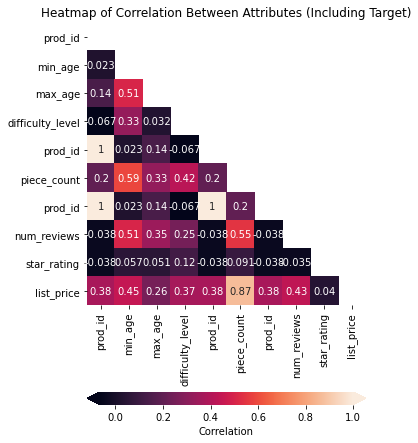

In [221]:
# __SOLUTION__

# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = train
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(5, 8))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

Based on the heatmap, which feature is most strongly correlated with the target (`list_price`)? In other words, which feature has the strongest positive or negative correlation — the correlation with the greatest magnitude?

In [222]:
# Replace None with the name of the feature (a string)

most_correlated_feature = None

In [223]:
# __SOLUTION__

most_correlated_feature = "piece_count"

Create a scatter plot of that feature vs. listing price:

In [224]:
# Replace None with your code

None

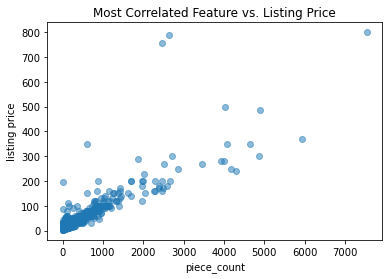

In [225]:
# __SOLUTION__

fig, ax = plt.subplots()

ax.scatter(df[most_correlated_feature], df.list_price, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("listing price")
ax.set_title("Most Correlated Feature vs. Listing Price");

Assuming you correctly identified `piece_count` (the number of pieces in the LEGO set) as the most correlated feature, you should have a scatter plot that shows a fairly clear linear relationship between that feature and the target. It looks like we are ready to proceed with making our baseline model without any additional transformation.

# 3. Build a Simple Linear Regression Model

Now, we'll build a linear regression model using just that feature. 

In the cell below, fit a statsmodels linear regression model to the data and output a summary for the model. 

In [226]:
import statsmodels.formula.api as smf

# Replace None with your code

model = None

In [227]:
# __SOLUTION__

import statsmodels.formula.api as smf

model = smf.ols('list_price ~ piece_count', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     2141.
Date:                Thu, 09 Sep 2021   Prob (F-statistic):          6.91e-221
Time:                        16:11:57   Log-Likelihood:                -3749.0
No. Observations:                 744   AIC:                             7502.
Df Residuals:                     742   BIC:                             7511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      11.4565      1.593      7.192      0.000       8.329      14.584
piece_count     0.0875      0.002     46.273      0.000       0.084       0.091
==============================================================================
Omnibus:                     1141.526   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           464258.231
Skew:                           8.756   Prob(JB):                         0.00
Kurtosis:                     124.117   Cond. No.                         978.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. Interpret the Simple Linear Regression Model

Once the model has been fit, the coefficient for the intercept, the independent variable, p-values, and the coefficient confidence intervals should be interpeted. We should ask ourselves whether or not the relationship our model is finding seems plausible.

==SOLUTION==

This model suggests that on average, the price of a lego set increases between 0.081 and 0.089 US dollars when the piece count of the lego set is increased by 1. This model finds that when there are 0 pieces, the average price of a lego set is between \\$8.955 and \\$15.640. Given that a lego set must have pieces, this intercept is not very useful. The coefficients for the intercept and the piece count variable are both statistically significant (p<0.05).

# 5. Evaluate the Simple Linear Regression Model

Before we can make a final assessment of our model, we need to compare its metrics with the baseline model created in step one, and we need to check the assumptions of linear regression.

### Compare the $R^2$ and the Root Mean Squared Error of the simple linear regression model with the baseline model. 

In [228]:
# Replace None with your code
model_r2 = None

model_rmse = None

print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)
print('----------------------------')
print('Regression R^2: ', model_r2)
print('Regression RMSE:', model_rmse)

Baseline R^2:  0.0
Baseline RMSE: 70.31606908300459
----------------------------
Regression R^2:  None
Regression RMSE: None


In [231]:
#__SOLUTION__
model_r2 = r2_score(df.list_price, model.predict())

model_rmse = mean_squared_error(df.list_price, model.predict(), squared=False)

print('Baseline R^2: ', baseline_r2)
print('Baseline RMSE:', baseline_rmse)
print('------------------------------------')
print('Regression R^2: ', model_r2)
print('Regression RMSE:', model_rmse)

Baseline R^2:  0.0
Baseline RMSE: 70.31606908300459
------------------------------------
Regression R^2:  0.7426440497844149
Regression RMSE: 37.33856230937886


### Interpret the model metrics

==SOLUTION==

**$R^2$**:

- The simple linear regression model is explains approximately 76% of the dependent variable's variance. 
- The simple linear regression model produced a 76 point improvement over the baseline model. 

**RMSE**:

- The simple linear regression model's predictions are off, on average, by about \\$35
- The simple linear regression model's predictions are about \\$35 more accurate than the baseline model.

### Check the assumptions of simple linear regression

#### Investigating Linearity

First, let's check whether the linearity assumption holds.

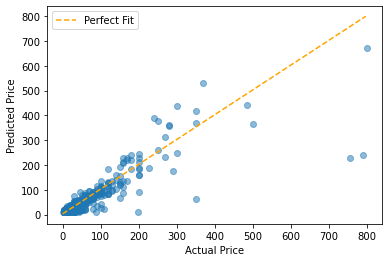

In [232]:
# Run this cell without changes

preds = model.predict()
fig, ax = plt.subplots()

perfect_line = np.arange(df.list_price.min(), df.list_price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.list_price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

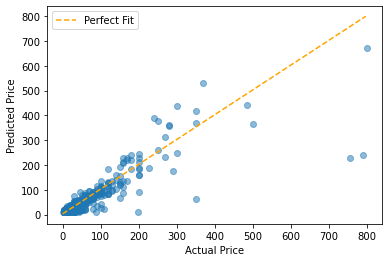

In [234]:
# __SOLUTION__
preds = model.predict()
fig, ax = plt.subplots()

perfect_line = np.arange(df.list_price.min(), df.list_price.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(df.list_price, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

Are we violating the linearity assumption?

In [ ]:
# Replace None with appropriate text
"""
None
"""

In [38]:
# __SOLUTION__
"""
We have some outliers that are all over the
place, but in general it looks like we have
a linear relationship (not violating this
assumption)
"""

'\nWe have some outliers that are all over the\nplace, but in general it looks like we have\na linear relationship (not violating this\nassumption)\n'

#### Investigating Normality

Now let's check whether the normality assumption holds for our model.

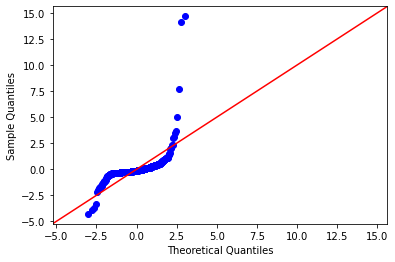

In [236]:
# Run this code without changes
import scipy.stats as stats
import statsmodels.api as sm

residuals = (df.list_price - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

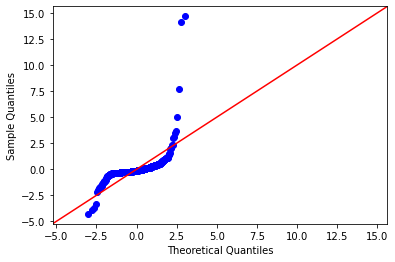

In [237]:
# __SOLUTION__
import scipy.stats as stats
residuals = (df.list_price - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Are we violating the normality assumption?

In [ ]:
# Replace None with appropriate text
"""
None
"""

In [40]:
# __SOLUTION__
"""
Our outliers are again causing problems. This
is bad enough that we can probably say that we
are violating the normality assumption
"""

'\nOur outliers are again causing problems. This\nis bad enough that we can probably say that we\nare violating the normality assumption\n'

#### Investigating Homoscedasticity

Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

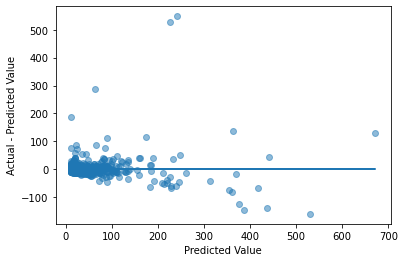

In [239]:
# Run this cell without changes
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(df))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

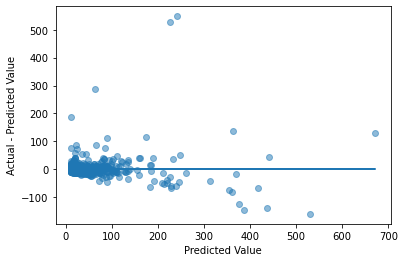

In [240]:
# __SOLUTION__ 
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(df))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

Are we violating the homoscedasticity assumption?

In [ ]:
# Replace None with appropriate text
"""
None
"""

In [44]:
# __SOLUTION__
"""
This is not the worst "funnel" shape, although
the residuals do seem to differ some based on
the predicted price. We are probably violating
a strict definition of homoscedasticity.
"""

'\nThis is not the worst "funnel" shape, although\nthe residuals do seem to differ some based on\nthe predicted price. We are probably violating\na strict definition of homoscedasticity.\n'

### Linear Regression Assumptions Conclusion

Given your answers above, how should we interpret our model's coefficients? Do we have a model that can be used for inferential as well as predictive purposes? What might your next steps be?

In [ ]:
# Replace None with appropriate text
"""
None
"""

In [241]:
# __SOLUTION__
"""
Our confidence in the piece count coefficient should not be too high, since
we are violating or close to violating more than one of the
assumptions of linear regression. This really only should be used
for predictive purposes.

A good next step here would be to start trying to figure out why
our outliers behave the way they do. Additionally, adding other variables
to the model (Moving beyond simple linear regression) may help meet the assumptions.
"""

'\nOur confidence in the piece count coefficient should not be too high, since\nwe are violating or close to violating more than one of the\nassumptions of linear regression. This really only should be used\nfor predictive purposes.\n\nA good next step here would be to start trying to figure out why\nour outliers behave the way they do. Additionally, adding other variables\nto the model (Moving beyond simple linear regression) may help meet the assumptions.\n'

# Level Up: Project Enhancements

After completing the project, you could consider the following enhancements if you have time:

* Compile the data cleaning code into a function
* Identify and remove outliers, then redo the analysis
* Identify models with high or low value for LEGO buyers, using the differences between actual and predicted prices
* Conduct statistical tests using the numeric features in the dataset to make inferences about the population of LEGO sets

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements.